imu9_12.png


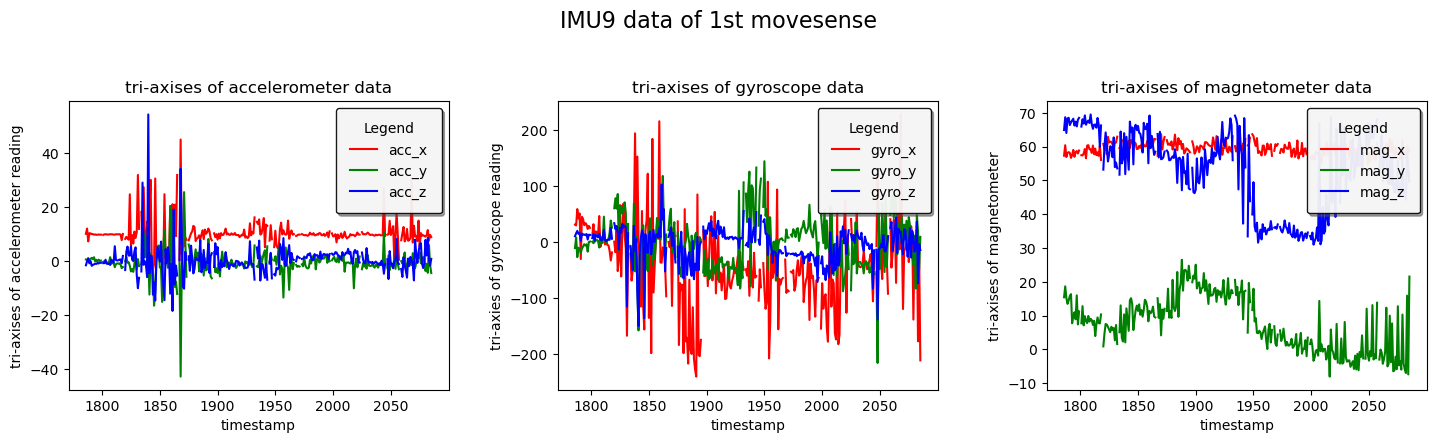

imu9_13.png


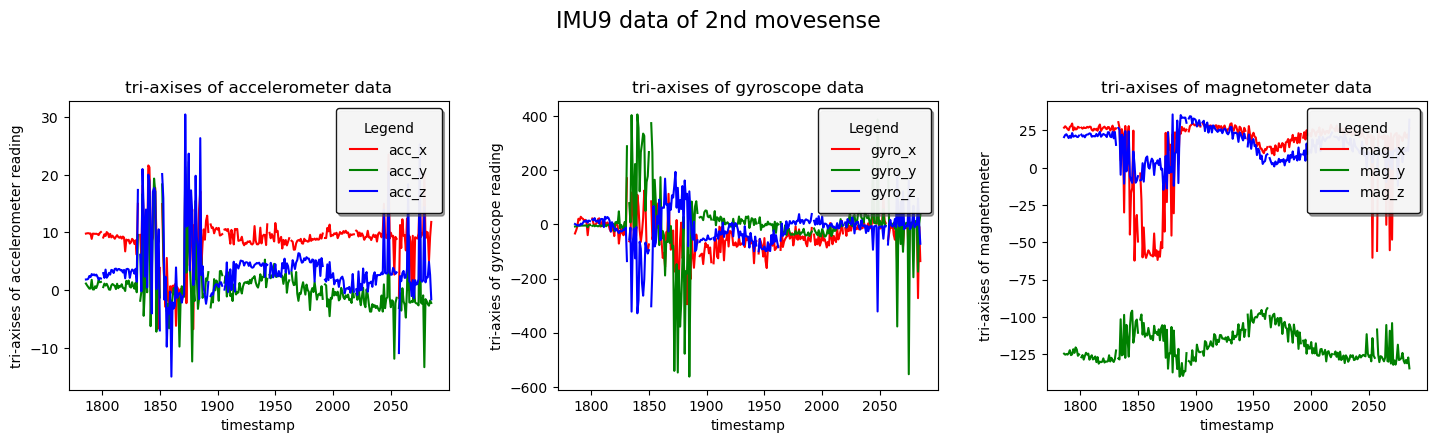

imu9_14.png


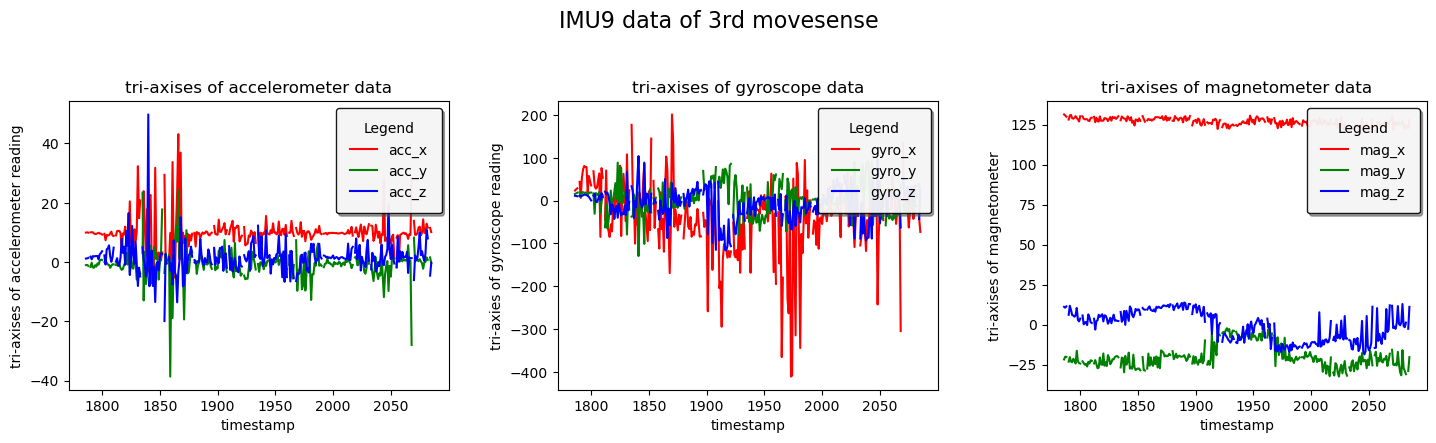

imu9_15.png


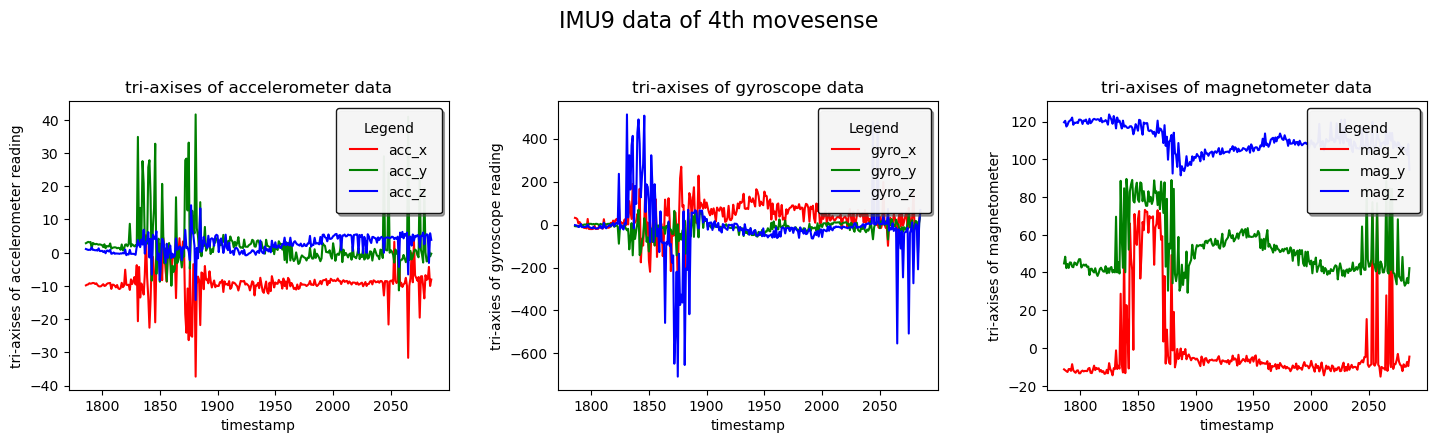

imu9_16.png


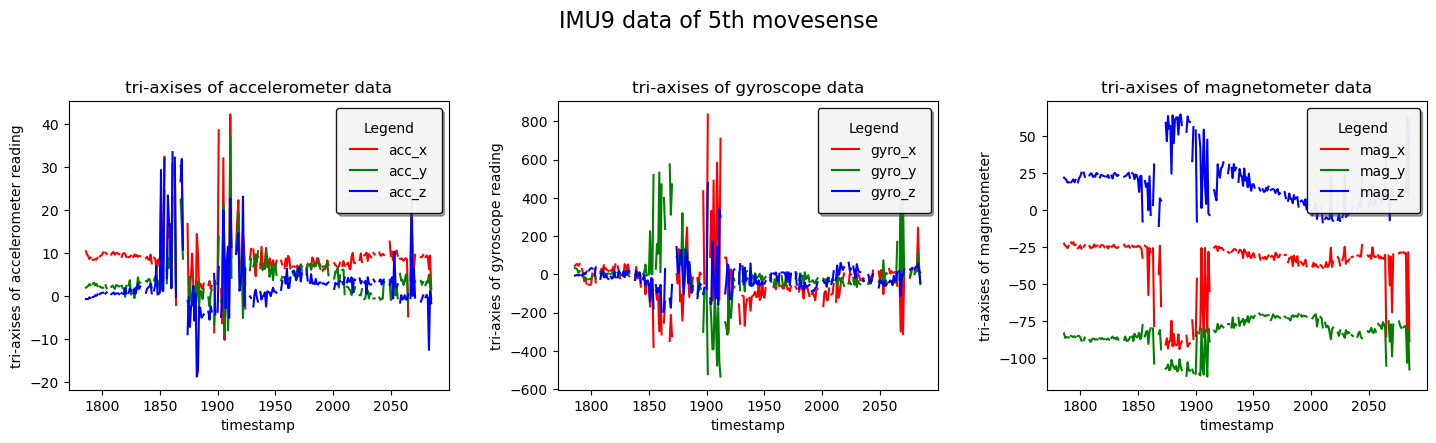

imu9_17.png


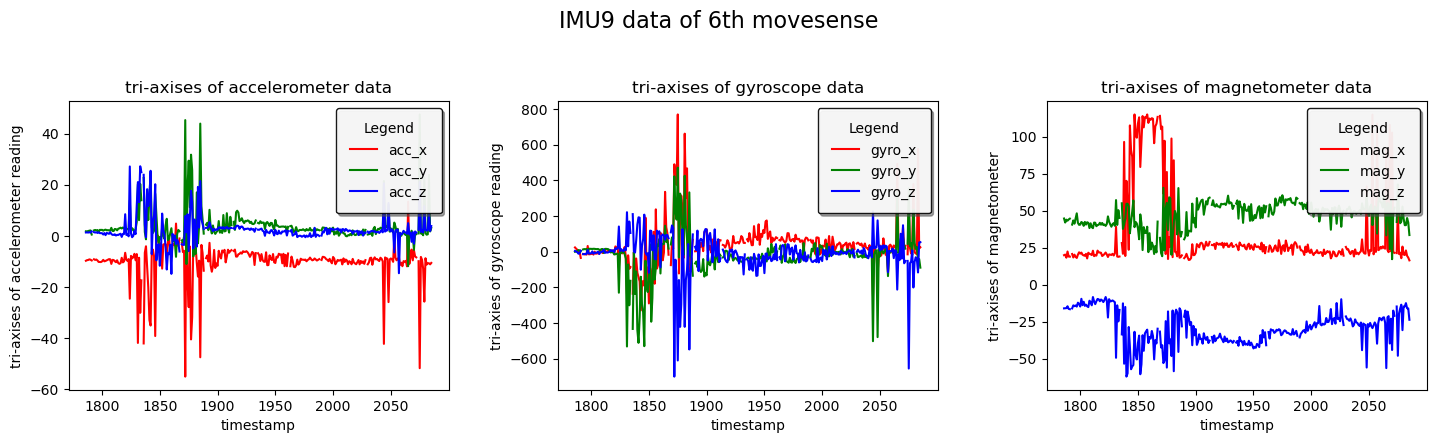

In [7]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

class PlotData:
    def __init__(self):

        super().__init__()
        pass


    def plot_data(data, title, xlabel, ylabel, filename):
        plt.plot(data)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.savefig(filename)
        plt.show()

    def plot_data_2(data1: pd.DataFrame, data2: pd.DataFrame, data3: pd.DataFrame = [], data4: pd.DataFrame = [], title: str = 'IMU data', xlabel: str = 'timestamp', ylabel:str = None, filename: 'str.png' = 'output.png') -> None:
        '''
        This function is used to plot the data with 3 axis, x, y, z respectively in one plot of accelerometer data, gyroscope data, magnetometer data.
        data1: x-axis data, pd.DataFrame, timestamp
        data2: y-axis data, pd.DataFrame, imu_x data
        data3: y-axis data, pd.DataFrame, imu_y data
        data4: y-axis data, pd.DataFrame, imu_z data'''
        n = len(data1)
        
        plt.plot(data1, data2, label='x', color='r')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        

        if len(data3) == 0:
            data3 = np.zeros(n)
        elif len(data3) != n:
            print('data3 length is not equal to data1')
            plt.show()
            return
        
        plt.plot(data1, data3, label='y', color='g')
        if len(data4) == 0:
            data4 = np.zeros(n)
        elif len(data4) != n:
            print('data4 length is not equal to data1')
            plt.show()
            return
        plt.plot(data1, data4, label='z', color='b')
        plt.savefig(filename)
        plt.show()

    def plot_data_imu9(data1: pd.DataFrame, data2: pd.DataFrame, data3: pd.DataFrame, data4: pd.DataFrame, data5: pd.DataFrame, \
                        data6: pd.DataFrame, data7: pd.DataFrame, data8: pd.DataFrame, data9: pd.DataFrame, data10: pd.DataFrame, \
                        title: str = 'IMU data', xlabel: str = 'timestamp', ylabel_1:str = None, ylabel_2: str = None, \
                        ylabel_3: str = None, legend_1: str = 'acc_x', legend_2:str = 'acc_y', legend_3:str = 'acc_z', \
                        legend_4:str = 'gyro_x', legend_5:str = 'gyro_y', legend_6:str = 'gyro_z', legend_7:str = 'mag_x', \
                        legend_8:str = 'mag_y', legend_9:str = 'mag_z', filename: 'str.png' = 'output.png') -> None:
        
        '''
        This function is used to plot the data with 3 axis, x, y, z respectively in one plot of accelerometer data, gyroscope data, magnetometer data.
        data1: x-axis data, pd.DataFrame, timestamp
        data2: y-axis data, pd.DataFrame, acc_x data
        data3: y-axis data, pd.DataFrame, acc_y data
        data4: y-axis data, pd.DataFrame, acc_z data
        data5: y-axis data, pd.DataFrame, gyro_x data
        data6: y-axis data, pd.DataFrame, gyro_y data
        data7: y-axis data, pd.DataFrame, gyro_z data
        data8: y-axis data, pd.DataFrame, mag_x data
        data9: y-axis data, pd.DataFrame, mag_y data
        data10: y-axis data, pd.DataFrame, mag_z data
        '''
        n = len(data1)
        if len(data2) == len(data3) == len(data4) == n:

            # draw a figure with 3 subplots, acc, gyro, and mag respectively, each subplot has 3 lines, x, y, z respectively
            _, ax = plt.subplots(1,3,figsize=(15,5))

            # plot the data of accelerometer
            ax[0].plot(data1, data2, label=legend_1, color='r')
            ax[0].set_title('tri-axises of accelerometer data') 
            ax[0].set_xlabel(xlabel)
            ax[0].set_ylabel(ylabel_1)
            

            ax[0].plot(data1, data3, label=legend_2, color='g')
            

            ax[0].plot(data1, data4, label=legend_3, color='b')
            ax[0].legend(loc='upper right', title='Legend', shadow=True, fancybox=True, framealpha=0.9, borderpad=1, ncol=1, fontsize='medium', edgecolor='black')
            
            # plot the data of gyroscope
            ax[1].plot(data1, data5, label=legend_4, color='r')
            ax[1].set_title('tri-axises of gyroscope data')
            ax[1].set_xlabel(xlabel)
            ax[1].set_ylabel(ylabel_2)

            ax[1].plot(data1, data6, label=legend_5, color='g')

            ax[1].plot(data1, data7, label=legend_6, color='b')
            ax[1].legend(loc='upper right', title='Legend', shadow=True, fancybox=True, framealpha=0.9, borderpad=1, ncol=1, fontsize='medium', edgecolor='black')

            # plot the data of magnetometer
            ax[2].plot(data1, data8, label=legend_7, color='r')
            ax[2].set_title('tri-axises of magnetometer data')
            ax[2].set_xlabel(xlabel)
            ax[2].set_ylabel(ylabel_3)

            ax[2].plot(data1, data9, label=legend_8, color='g')

            ax[2].plot(data1, data10, label=legend_9, color='b')
            ax[2].legend(loc='upper right', title='Legend', shadow=True, fancybox=True, framealpha=0.9, borderpad=1, ncol=1, fontsize='medium', edgecolor='black')

            plt.suptitle(title, fontsize=16, y=0.93)

            plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.5, hspace=0.5)
            plt.tight_layout(pad=3.0)
            plt.savefig(filename)
            plt.show()
            # plt.close()
            
    def get_filename(filename: str) -> str:
        '''this function is used to get the filename with a number appended to the filename if the filename exists in the directory.'''
        file, extension = os.path.splitext(filename)
        
        couter = 1
        while os.path.exists(os.path.join('./imgs/', filename)):
            filename = file + '_' + str(couter) + extension
            couter += 1
        # assert type(filename) != str, 'filename is not a string'
        print(filename)
        return filename

def main():
    data = pd.read_csv('/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/output/merge_1_1.csv')
    # print(data['timestamp'])
    # print(data.iloc[0:,2])
    
    # PlotData.plot_data_2(data['timestamp'][1786:2086], data.iloc[01786:2086,2],'plot x-axis of accelerometer reading', 'timestamp', 'acc', 'acc.png')
    # PlotData.plot_data_2(data['timestamp'][1786:2086], data.iloc[01786:2086,5], data3=data.iloc[01786:2086, 6], data4=data.iloc[01786:2086, 7],  title='plot x-axis of gyroscope reading', xlabel='timestamp', ylabel='gyro', filename='gyro.png')
    # PlotData.plot_data_2(data['timestamp'][1786:2086], data.iloc[01786:2086,8], data3=data.iloc[01786:2086, 9], data4=data.iloc[01786:2086, 10], title='plot x-axis of magnetometer reading', xlabel='timestamp', ylabel='mag', filename='mag.png')

    filename = PlotData.get_filename('imu9.png')
    # print(filename)
    path = os.path.join('./imgs/', filename)
    PlotData.plot_data_imu9(data['relative_id'][1786:2086], data.iloc[1786:2086,2], data3=data.iloc[1786:2086, 3], data4=data.iloc[1786:2086, 4], data5=data.iloc[1786:2086, 5], \
                            data6=data.iloc[1786:2086, 6], data7=data.iloc[1786:2086, 7], data8=data.iloc[1786:2086, 8], data9=data.iloc[1786:2086, 9], data10=data.iloc[1786:2086, 10], \
                            title='IMU9 data of 1st movesense', xlabel='timestamp', ylabel_1='tri-axises of accelerometer reading', ylabel_2='tri-axies of gyroscope reading', \
                                  ylabel_3='tri-axises of magnetometer', filename=path)
    filename = PlotData.get_filename('imu9.png')
    # print(filename)
    path = os.path.join('./imgs/', filename)
    PlotData.plot_data_imu9(data['relative_id'][1786:2086], data.iloc[1786:2086,11], data3=data.iloc[1786:2086, 12], data4=data.iloc[1786:2086, 13], data5=data.iloc[1786:2086, 14], \
                            data6=data.iloc[1786:2086, 15], data7=data.iloc[1786:2086, 16], data8=data.iloc[1786:2086, 17], data9=data.iloc[1786:2086, 18], data10=data.iloc[1786:2086, 19], \
                                title='IMU9 data of 2nd movesense', xlabel='timestamp', ylabel_1='tri-axises of accelerometer reading', ylabel_2='tri-axies of gyroscope reading', \
                                    ylabel_3='tri-axises of magnetometer', filename=path)
    filename = PlotData.get_filename('imu9.png')
    # print(filename)
    path = os.path.join('./imgs/', filename)
    PlotData.plot_data_imu9(data['relative_id'][1786:2086], data.iloc[1786:2086,20], data3=data.iloc[1786:2086, 21], data4=data.iloc[1786:2086, 22], data5=data.iloc[1786:2086, 23], \
                            data6=data.iloc[1786:2086, 24], data7=data.iloc[1786:2086, 25], data8=data.iloc[1786:2086, 26], data9=data.iloc[1786:2086, 27], data10=data.iloc[1786:2086, 28], \
                                title='IMU9 data of 3rd movesense', xlabel='timestamp', ylabel_1='tri-axises of accelerometer reading', ylabel_2='tri-axies of gyroscope reading', \
                                    ylabel_3='tri-axises of magnetometer', filename=path)
    filename = PlotData.get_filename('imu9.png')
    # print(filename)
    path = os.path.join('./imgs/', filename)
    PlotData.plot_data_imu9(data['relative_id'][1786:2086], data.iloc[1786:2086,29], data3=data.iloc[1786:2086, 30], data4=data.iloc[1786:2086, 31], data5=data.iloc[1786:2086, 32], \
                            data6=data.iloc[1786:2086, 33], data7=data.iloc[1786:2086, 34], data8=data.iloc[1786:2086, 35], data9=data.iloc[1786:2086, 36], data10=data.iloc[1786:2086, 37], \
                                title='IMU9 data of 4th movesense', xlabel='timestamp', ylabel_1='tri-axises of accelerometer reading', ylabel_2='tri-axies of gyroscope reading', \
                                    ylabel_3='tri-axises of magnetometer', filename=path)
    filename = PlotData.get_filename('imu9.png')
    # print(filename)
    path = os.path.join('./imgs/', filename)
    PlotData.plot_data_imu9(data['relative_id'][1786:2086], data.iloc[1786:2086,38], data3=data.iloc[1786:2086, 39], data4=data.iloc[1786:2086, 40], data5=data.iloc[1786:2086, 41], \
                            data6=data.iloc[1786:2086, 42], data7=data.iloc[1786:2086, 43], data8=data.iloc[1786:2086, 44], data9=data.iloc[1786:2086, 45], data10=data.iloc[1786:2086, 46], \
                                title='IMU9 data of 5th movesense', xlabel='timestamp', ylabel_1='tri-axises of accelerometer reading', ylabel_2='tri-axies of gyroscope reading', \
                                    ylabel_3='tri-axises of magnetometer', filename=path)
    filename = PlotData.get_filename('imu9.png')
    # print(filename)
    path = os.path.join('./imgs/', filename)
    PlotData.plot_data_imu9(data['relative_id'][1786:2086], data.iloc[1786:2086,47], data3=data.iloc[1786:2086, 48], data4=data.iloc[1786:2086, 49], data5=data.iloc[1786:2086, 50], \
                            data6=data.iloc[1786:2086, 51], data7=data.iloc[1786:2086, 52], data8=data.iloc[1786:2086, 53], data9=data.iloc[1786:2086, 54], data10=data.iloc[1786:2086, 55], \
                                title='IMU9 data of 6th movesense', xlabel='timestamp', ylabel_1='tri-axises of accelerometer reading', ylabel_2='tri-axies of gyroscope reading', \
                                    ylabel_3='tri-axises of magnetometer', filename=path)
    
    

if __name__ == '__main__':
    main()